In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.markers import MarkerStyle
import cmocean
import pandas as pd
import numpy as np
import scipy.stats as ss

import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
# Suppress specific RuntimeWarning related to mean of empty slice
warnings.filterwarnings(action="ignore", category=RuntimeWarning, message=".*Mean of empty slice.*")

In [81]:
plt.rcParams.update({
    "figure.facecolor": "white",
    "savefig.facecolor": "white",
    #"font.size": 9
})
ONE_COLUMN_WIDTH = 8.3
TWO_COLUMN_WIDTH = 12
GOLDEN_RATIO = 1.61
cm = 1 / 2.54  # centimeters in inches

In [17]:
binned_finestructure_dissipation = pd.read_csv("../derived_data/binned_finestructure_dissipation.csv", index_col = 0)
binned_finestructure_dissipation.columns = binned_finestructure_dissipation.columns.astype("float") #convert column names from strings to floats
binned_finestructure_dissipation.head()

,-53.5,-53.0,-52.5,-52.0,-51.5,-51.0,-50.5,-50.0,-49.5,-49.0,-48.5,-48.0,-47.5,-47.0
62.0,6.043735e-10,1.734269e-09,9.798453e-09,1.044405e-09,8.021675e-10,7.744046e-10,6.359012e-10,2.591982e-10,3.335413e-10,3.324426e-10,9.029678e-11,9.739017e-11,1.636815e-10,1.359135e-11
187.0,7.965103e-10,3.283406e-09,5.233763e-09,4.960701e-09,2.193591e-09,2.614172e-09,5.192939e-10,1.780772e-09,1.851746e-09,3.757822e-10,3.977511e-10,6.727422e-11,1.144524e-10,1.160336e-10
312.0,NaN,6.574537e-09,2.531349e-08,8.665921e-09,1.403223e-08,2.561817e-09,2.971783e-10,7.438957e-10,1.357557e-09,2.718102e-10,1.126462e-09,1.370712e-10,4.333585e-10,8.515302e-10
437.0,NaN,7.340639e-09,4.820197e-09,1.765682e-09,2.966885e-09,8.742657e-10,2.855886e-10,4.448810e-10,2.125415e-09,1.223184e-10,1.076213e-10,6.303895e-11,1.467980e-10,6.107825e-11
562.0,NaN,NaN,3.518181e-10,9.567619e-10,3.715320e-09,4.580561e-10,2.410084e-10,2.749154e-10,3.067187e-10,1.258181e-10,3.172554e-11,7.582789e-11,9.160456e-11,3.740574e-11


In [30]:
# interpolate bins to higher resolution
new_index = np.arange(0,600)
finestructure = binned_finestructure_dissipation.iloc[:6].reindex(index=new_index, method="nearest").iloc[0:600]

In [33]:
if False: #True:
    fig, ax = plt.subplots(ncols = 2, layout = "constrained", sharey = True, sharex = True)
    cmap = cmocean.cm.tempo
    mpp = ax[0].pcolormesh(
        binned_finestructure_dissipation.columns, 
        binned_finestructure_dissipation.index, 
        binned_finestructure_dissipation,
        norm=mcolors.LogNorm(vmin=1e-11, vmax=1e-7),
        cmap=cmap,
    )
    ax[0].set_ylim(-5,600)
    #cb = plt.colorbar(mpp, ax=ax, location="top", extend = "max")
    #cb.set_label(r"Dissipation rate $\varepsilon_{\mathrm{IGW, finestructure}}\,$(W$\,$kg$^{-1}$)")
    #draw_water_mass_boundaries(ax)
    #ax.set_xlabel("Longitude (°)")
    #ax.set_ylabel("Meters above Seafloor");
    mpp = ax[1].pcolormesh(
        finestructure.columns, 
        finestructure.index, 
        finestructure,
        norm=mcolors.LogNorm(vmin=1e-11, vmax=1e-7),
        cmap=cmap,
    )

In [18]:
wave_energy_dissipation = pd.read_csv("../derived_data/wave_energy_dissipation.csv", index_col = 0)
wave_energy_dissipation.head()

,lon,lat,rounded depth,rounded mab,barotropic,continuum,available E,E Error,N,N Error,coriolis frequency,eps_IGW,eps_IGW_mult_error,eps_IGW_add_error
index,,,,,,,,,,,,,,
0,-52.2870,-63.4032,299,343,0.000807,0.000353,0.000353,1.592056e-06,0.001586,0.000466,-0.000130,5.737885e-10,1.641828,3.375698e-10
1,-52.2870,-63.4032,505,137,0.000807,0.000559,0.000741,9.692530e-07,0.001135,0.000268,-0.000130,4.402297e-09,1.476335,2.082164e-09
2,-52.2870,-63.4032,614,28,0.000807,0.000645,0.000850,1.138264e-07,0.000614,0.000283,-0.000130,1.548914e-08,2.035173,1.428215e-08
3,-51.6357,-63.5145,1318,338,0.000423,0.000365,0.000476,5.356444e-07,0.001157,0.000225,-0.000131,1.764363e-09,1.377578,6.852385e-10
4,-51.6357,-63.5145,1513,143,0.000423,0.000544,0.000592,9.137856e-07,0.001206,0.000233,-0.000131,2.549531e-09,1.377235,9.862902e-10


In [52]:
mooring_lons = wave_energy_dissipation["lon"].unique()
closest_lons = {}
second_closest_lons = {}
for lon in mooring_lons:
    distances = np.abs(np.array(binned_finestructure_dissipation.columns) - lon)
    closest_index = np.argsort(distances)[0]
    closest_lon = binned_finestructure_dissipation.columns[closest_index]
    closest_lons[float(lon)] = float(closest_lon)
    
    second_closest_index = np.argsort(distances)[1]
    second_closest_lon = binned_finestructure_dissipation.columns[second_closest_index]
    second_closest_lons[float(lon)] = float(second_closest_lon)
    print(f"mooring at {lon:.2f}, closest bin at {closest_lon:.2f}, 2nd closest bin at {second_closest_lon:.2f}")

mooring at -52.29, closest bin at -52.50, 2nd closest bin at -52.00
mooring at -51.64, closest bin at -51.50, 2nd closest bin at -52.00
mooring at -50.81, closest bin at -51.00, 2nd closest bin at -50.50
mooring at -50.09, closest bin at -50.00, 2nd closest bin at -50.50
mooring at -49.27, closest bin at -49.50, 2nd closest bin at -49.00
mooring at -48.38, closest bin at -48.50, 2nd closest bin at -48.00
mooring at -47.49, closest bin at -47.50, 2nd closest bin at -47.00


In [61]:
mabs = []
ratios = []
second_ratios = []
lons = []
for index, row in wave_energy_dissipation.iterrows():
    lon = row["lon"]
    mab = row["rounded mab"]
    profile = finestructure[closest_lons[lon]]
    ratio = profile.iloc[int(mab)] / row["eps_IGW"]
    mabs.append(mab)
    ratios.append(ratio)
    lons.append(lon)

    second_profile = finestructure[second_closest_lons[lon]]
    second_ratio = second_profile.iloc[int(mab)] / row["eps_IGW"]
    second_ratios.append(second_ratio)

ratio_df = pd.DataFrame({"mab":mabs, "ratio":ratios, "lon":lons})
second_ratio_df = pd.DataFrame({"mab":mabs, "ratio":second_ratios, "lon":lons})
ratio_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
mab,343.000000,137.000000,28.000000,338.000000,143.00000,31.000000,350.000000,143.000000,357.00000,142.000000,33.000000,353.000000,90.000000,31.0000,40.000000,39.000000,0.000000
ratio,44.116408,1.188871,0.632601,7.953145,0.86039,0.274754,1.461115,1.467852,0.27968,1.644669,0.124093,3.877335,0.554862,0.4371,0.591487,1.213396,0.490843
lon,-52.287000,-52.287000,-52.287000,-51.635700,-51.63570,-51.635700,-50.811300,-50.811300,-50.08970,-50.089700,-50.089700,-49.268200,-49.268200,-49.2682,-48.380500,-47.490300,-47.490300


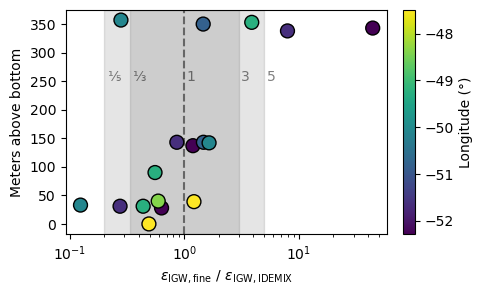

In [95]:
fig, ax = plt.subplots(1,figsize=(TWO_COLUMN_WIDTH * cm, 0.6 * TWO_COLUMN_WIDTH * cm), layout="constrained")
ax.axvline(1, color = "k", ls = "--", alpha = 0.5)
ax.axvspan(1/3,3, color = "k", alpha = 0.1)
ax.axvspan(1/5,5, color = "k", alpha = 0.1)
ax.set_xscale("log")
mpp = ax.scatter(ratio_df["ratio"], ratio_df["mab"], c=ratio_df["lon"], edgecolor = "k", s = 100)
#ax.scatter(second_ratio_df["ratio"], ratio_df["mab"], alpha = 0.5)

for x in [1,3,5]:
    ax.text(1.05*x,250,str(x),color="k", alpha = 0.5)
for x, s in zip([1/5,1/3],["⅕","⅓"]):
    ax.text(1.05*x,250,s,color="k", alpha = 0.5)


ax.set_xlabel(r"$\varepsilon_\mathrm{IGW, fine}$ / $\varepsilon_\mathrm{IGW, IDEMIX}$")
ax.set_ylabel("Meters above bottom")
cb = fig.colorbar(mpp)
cb.set_label("Longitude (°)")
plt.savefig("./igw_ratios.pdf")

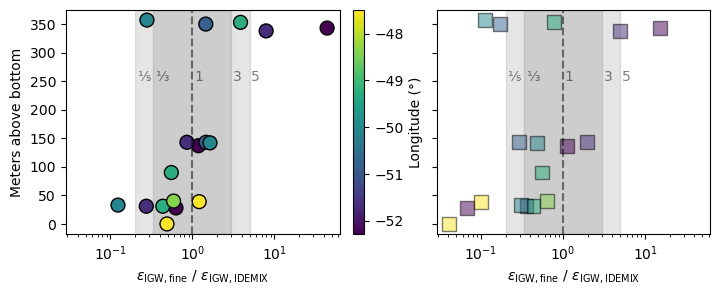

In [99]:
fig, axis = plt.subplots(ncols=2,figsize=(1.5*TWO_COLUMN_WIDTH * cm, 0.6 * TWO_COLUMN_WIDTH * cm), layout="constrained", sharex=True, sharey=True)

for ax in axis:
    ax.axvline(1, color = "k", ls = "--", alpha = 0.5)
    ax.axvspan(1/3,3, color = "k", alpha = 0.1)
    ax.axvspan(1/5,5, color = "k", alpha = 0.1)
    ax.set_xscale("log")
    for x in [1,3,5]:
        ax.text(1.05*x,250,str(x),color="k", alpha = 0.5)
    for x, s in zip([1/5,1/3],["⅕","⅓"]):
        ax.text(1.05*x,250,s,color="k", alpha = 0.5)
    ax.set_xlabel(r"$\varepsilon_\mathrm{IGW, fine}$ / $\varepsilon_\mathrm{IGW, IDEMIX}$")
        
mpp = axis[0].scatter(ratio_df["ratio"], ratio_df["mab"], c=ratio_df["lon"], edgecolor = "k", s = 100)
axis[1].scatter(second_ratio_df["ratio"], ratio_df["mab"], c=ratio_df["lon"], edgecolor = "k", s = 100, alpha = 0.5, marker = "s")

axis[0].set_ylabel("Meters above bottom")
cb = fig.colorbar(mpp)
cb.set_label("Longitude (°)")
plt.savefig("./igw_ratios.pdf")